# Changes in Biodiversity Intactness Index influenced by Urban Expansion in The Phoenix Metropolitan Area Over Time

Author: Ixel M. 
GitHub repository: https://github.com/IIDonaji/urban-sprawl-biodiversity-phoenix  

## Purpose: 

what is this notebook about?
## Highlights: 

- 
- 
- 
-

## About The Data:
- BII `data:io-biodiversity` collection, from the Microsoft Planetary Computer's STAC catalog. This dataset was generated by Impact Observatory, in collaboration with Vizzuality. It contains terrestrial biodiversity intactness data at 100m resolution.

Microsoft Planetary Computer, STAC Catalog. Biodiversity Intactness ('io-biodiversity'). [Dataset]. https://planetarycomputer.microsoft.com/dataset/io-biodiversity Accessed 5 December 2025.

- United States Census Bureau, County Subdivision shapefiles for Arizona. County subdivision level census data from 2022.

United States Census Bureau. (2022). Arizona County Subdivision 2022 TIGER/Line Shapefiles. [Data File]. U.S. Census Bureau, Geography Division. https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=County+Subdivisions Accessed 5 December 2025.

### References
[1]
Z. Levitt and J. Eng, “Where America’s developed areas are growing: ‘Way off into the horizon’,” The Washington Post, Aug. 2021, Available: https://www.washingtonpost.com/nation/interactive/2021/land-development-urban-growth-maps/. [Accessed: Dec. 4, 2025]
[2]
F. Gassert, J. Mazzarello, and S. Hyde, “Global 100m Projections of Biodiversity Intactness for the years 2017-2020 [Technical Whitepaper].” Aug. 2022. Available: https://ai4edatasetspublicassets.blob.core.windows.net/assets/pdfs/io-biodiversity/Biodiversity_Intactness_whitepaper.pdf

[3]
Microsoft Planetary Computer, STAC Catalog. Biodiversity Intactness ('io-biodiversity'). [Dataset]. https://planetarycomputer.microsoft.com/dataset/io-biodiversity Accessed 5 December 2025.


### Import the following libraries and packages

In [1]:
# Import library using standard abberivations 

import os # for reproducible file paths
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # for custom legend


# geospatial tools
import xarray as xr
import rioxarray as rioxr
from shapely.geometry import box

# planetary computer tools
from pystac_client import Client # to access STAC catalog
import planetary_computer # To sign items from the MPC STAC catalog

# for images and mapping
from IPython.display import Image # To nicely display images
import contextily as ctx #for adding basemaps

# Read in Data, Explore and Wrangle

- To access the BII Time Series data we use the `Client` function from the `pystac_client` package
- Narrow down the catalog search by specifying time range, an area of interest, and the collection name.

    - Define area of interest using a `GeoJSON-type` dictionary with the following coordinates for the bouding box:
    
         `[-112.826843, 32.974108, -111.184387, 33.863574]`
    - Search the `io-biodiversity` collection.
    - Use the 2017 and 2020 rasters covering the Phoenix subdivision time range.
- The Phoenix Subdivision Shapefile was downloaded into a data/ folder in the same level as this notebook.

In [ ]:
# Access MPC catalog
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace, # `modifier` parameter is needed to access the data in the MPC catalog.
)

# Explore catalog matadata
print('Title:', catalog.title)
print('Description:', catalog.description)

# Pull out the io_biodiversity collection
bio_collection = catalog.get_child('io-biodiversity')

# Reduce outputs exploration with key metadata information
print("\nID:", bio_collection.id)
print("Title:", bio_collection.title)
print("Description:", bio_collection.description)
print("Extent:", bio_collection.extent)

Title: Microsoft Planetary Computer STAC API
Description: Searchable spatiotemporal metadata describing Earth science datasets hosted by the Microsoft Planetary Computer

ID: io-biodiversity
Title: Biodiversity Intactness
Description: Generated by [Impact Observatory](https://www.impactobservatory.com/), in collaboration with [Vizzuality](https://www.vizzuality.com/), these datasets estimate terrestrial Biodiversity Intactness as 100-meter gridded maps for the years 2017-2020.

Maps depicting the intactness of global biodiversity have become a critical tool for spatial planning and management, monitoring the extent of biodiversity across Earth, and identifying critical remaining intact habitat. Yet, these maps are often years out of date by the time they are available to scientists and policy-makers. The datasets in this STAC Collection build on past studies that map Biodiversity Intactness using the [PREDICTS database](https://onlinelibrary.wiley.com/doi/full/10.1002/ece3.2579) of spa

In [69]:
# Temporal range of interest (BII rasters 4-year window)
time_range = "2017-01-01/2020-01-01"

# Define bbox around Phoenix subdivision
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

# Search items in the collection
search = catalog.search(
    collections = ['io-biodiversity'],
    bbox = bbox,
    datetime = time_range)

# Retrieve search items 
items = search.item_collection()
print(f"There is {len(items)} items in the search.") # Output identifies 4 items (BII rasters found for Phoenix from 2017–2020) in catalog that match search

There is 4 items in the search.


In [70]:
# Get items as a list
all_items = list(search.items())

# Print item ID and properties
for item in all_items:
    print(item.id, item.properties)

bii_2020_34.74464974521749_-115.38597824385106_cog {'datetime': None, 'proj:epsg': 4326, 'proj:shape': [7992, 7992], 'end_datetime': '2020-12-31T23:59:59Z', 'proj:transform': [0.0008983152841195215, 0.0, -115.38597824385106, 0.0, -0.0008983152841195215, 34.74464974521749, 0.0, 0.0, 1.0], 'start_datetime': '2020-01-01T00:00:00Z'}
bii_2019_34.74464974521749_-115.38597824385106_cog {'datetime': None, 'proj:epsg': 4326, 'proj:shape': [7992, 7992], 'end_datetime': '2019-12-31T23:59:59Z', 'proj:transform': [0.0008983152841195215, 0.0, -115.38597824385106, 0.0, -0.0008983152841195215, 34.74464974521749, 0.0, 0.0, 1.0], 'start_datetime': '2019-01-01T00:00:00Z'}
bii_2018_34.74464974521749_-115.38597824385106_cog {'datetime': None, 'proj:epsg': 4326, 'proj:shape': [7992, 7992], 'end_datetime': '2018-12-31T23:59:59Z', 'proj:transform': [0.0008983152841195215, 0.0, -115.38597824385106, 0.0, -0.0008983152841195215, 34.74464974521749, 0.0, 0.0, 1.0], 'start_datetime': '2018-01-01T00:00:00Z'}
bii_201

The exploration shows item ID's and properties for the io_biodiversity collection. Notice 'datetime' NONE in these items makes sense because there is no single moment in time. Year is available inside start_datetime and end_datetime because looking at an annual composition. 

In [50]:
# Get items in the catalog want 2020 and 2017 rasters
# Create a lookup table
lookup = {int(item.properties["start_datetime"][:4]): item for item in items} # year is available inside start_datetime not datetime 

# Store year propeties for later analysis
px_2017 = lookup[2017]
px_2020 = lookup[2020]

In [ ]:
# Import Arizona Census Subdivision data

# display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

arizona_fp = os.path.join('data','tl_2022_04_cousub','tl_2022_04_cousub.shp')
arizona = gpd.read_file(arizona_fp)

# preliminary exploration
arizona.head(2)

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,005,91198,01934931,0400591198,Flagstaff,Flagstaff CCD,22,Z5,G4040,None,None,None,S,12231052883,44653332,+35.1066114,-111.3662497,"POLYGON ((-112.13370 35.85596, -112.13368 35.8..."
1,04,005,91838,01934953,0400591838,Kaibab Plateau,Kaibab Plateau CCD,22,Z5,G4040,None,None,None,S,7228864534,29327221,+36.5991097,-112.1368033,"POLYGON ((-112.66039 36.53941, -112.66033 36.5..."


Clean column names, select Phoenix County, and check CRS.
Its important to check CRS when working with geospatial data in order to perform analysis.  

In [18]:
# Change column names to lower case
arizona.columns = arizona.columns.str.lower()

# Filter for Phoenix
phoenix = arizona[arizona.name == "Phoenix"]

print(phoenix.crs)

EPSG:4269


# Geographic Context 
Map the Phoenix subdivision within its broader geographic context. 

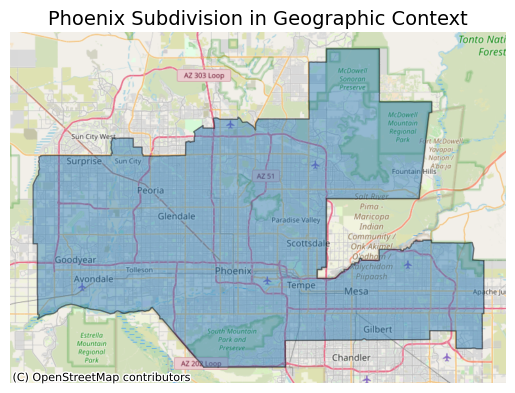

In [59]:
# set up figure
fig, ax = plt.subplots()

# create axis with plot
(phoenix.to_crs(epsg=3857) 
      .plot(ax=ax, figsize=(11, 10), alpha=0.45, edgecolor="k"))

# add NatGeo basemap from contextily
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.Mapnik)

# update axes
ax.set_title("Phoenix Subdivision in Geographic Context", fontdict= {"fontsize": "14"})
ax.set_axis_off()

# saving map as an image so we can input it elsewhere in our notebook
plt.savefig('figures/phoenix_county.png', bbox_inches = "tight", dpi = 100)